<a href="https://colab.research.google.com/github/YazCodes/Deep-Learning-projects/blob/main/PredictionOne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# load the mnist dataset from keras
import keras
from keras import datasets
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()

#normalisation 
# Normalize pixel values between 0 and 1
x_train = x_train.astype('float32') / 255.0 #the biggest pixel value in the grayscale image 
x_test = x_test.astype('float32') / 255.0

# One hot encode the output data
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

Epoch 1/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.9609 - accuracy: 0.6715 - val_loss: 0.4984 - val_accuracy: 0.8252
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4752 - accuracy: 0.8331 - val_loss: 0.4781 - val_accuracy: 0.8327
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4354 - accuracy: 0.8467 - val_loss: 0.4885 - val_accuracy: 0.8200
Epoch 4/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4214 - accuracy: 0.8509 - val_loss: 0.4518 - val_accuracy: 0.8403
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4045 - accuracy: 0.8561 - val_loss: 0.4576 - val_accuracy: 0.8337
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3945 - accuracy: 0.8604 - val_loss: 0.4325 - val_accuracy: 0.8457
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3859 - accuracy: 0.8657 - val_loss: 0.4404 - val_accuracy:

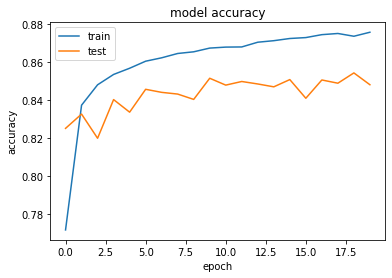

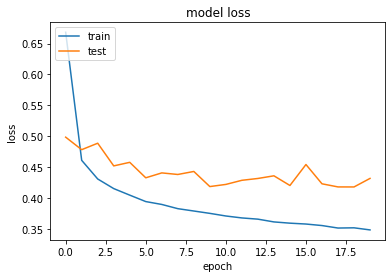

In [11]:
# Create, compile and fit the model with the original MNIST data
from keras import layers
from keras import Sequential
from keras.layers import Dense

model = keras.Sequential() #making our model 
model.add(keras.layers.Flatten(input_shape=(28, 28))) #input layer is flattern and our input shape. flatting our 2d 28,28 image 
model.add(Dense(units=10, activation='relu')) #10 units in output layer = the number of classes. our data has 10 digits from0-9
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy']) #we're classfificying our images to numbers 0-9

history = model.fit(x_train, y_train, epochs = 20, validation_data = (x_test, y_test)) #y_train is our catergorical data 



#Two Graphs 
# plot the history of the training
import matplotlib.pyplot as plt

# summarize the history for accuracy 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize the history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

How to increase the model accuracy 

1. Data augumentation, callback and learning rate




In [12]:
# use the image data generator from keras to augment the data
from keras.preprocessing.image import ImageDataGenerator
# setup the generator that will augment the images
train_gen = ImageDataGenerator(rotation_range=8,   # rotate
                               width_shift_range=0.08,  # width shiift
                               shear_range=0.3,   # shear
                               height_shift_range=0.08, # height shift
                               zoom_range=0.08 )   # zoom  - All these values were from trial and error 


import numpy as np
# Generate aungemnted images for the training data
x_train = np.reshape(x_train, (60000,28,28,1)) #6000 training images needs to be 3d to work so add our 2d 28,28 and then add a 1 
training_set = train_gen.flow(x_train, y_train, batch_size=x_train.shape[0])

# Generate aungemnted images for the test data
x_test = np.reshape(x_test, (10000,28,28,1))
test_set= train_gen.flow(x_test, y_test, batch_size=x_test.shape[0]) #adding flow function
#batch size set to the size of our training data - 60000

# extract the augmented images from the output flow of the generator
# add the augmented images generated from the training data to the original training data
i = 0
for x, y in training_set:
  if i < 2:
    print(i)
    x_train = np.concatenate((x_train, x))
    y_train = np.concatenate((y_train, y))
    print(x_train.shape)
    print(y_train.shape)
  else:
    break
  i += 1

# add the augmented images generated from the test data to the original test data
i = 0
for x, y in test_set:
  if i < 2:
    print(i)
    x_test_aug = np.concatenate((x_test, x))
    y_test_aug = np.concatenate((y_test, y))
    print(x_test.shape)
    print(y_test.shape)
  else:
    break
  i += 1

0
(120000, 28, 28, 1)
(120000, 10)
1
(180000, 28, 28, 1)
(180000, 10)
0
(10000, 28, 28, 1)
(10000, 10)
1
(10000, 28, 28, 1)
(10000, 10)


In [17]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', patience=5) #monitor the val loss and stop the training when epochs are 5

Epoch 1/20
5625/5625 [==============================] - 9s 1ms/step - loss: 0.9190 - accuracy: 0.6608 - val_loss: 0.5236 - val_accuracy: 0.8104
Epoch 2/20
5625/5625 [==============================] - 8s 1ms/step - loss: 0.6169 - accuracy: 0.7732 - val_loss: 0.4912 - val_accuracy: 0.8240
Epoch 3/20
5625/5625 [==============================] - 8s 1ms/step - loss: 0.5913 - accuracy: 0.7859 - val_loss: 0.4787 - val_accuracy: 0.8300
Epoch 4/20
5625/5625 [==============================] - 8s 1ms/step - loss: 0.5785 - accuracy: 0.7898 - val_loss: 0.4699 - val_accuracy: 0.8361
Epoch 5/20
5625/5625 [==============================] - 8s 1ms/step - loss: 0.5695 - accuracy: 0.7924 - val_loss: 0.4689 - val_accuracy: 0.8329
Epoch 6/20
5625/5625 [==============================] - 8s 1ms/step - loss: 0.5670 - accuracy: 0.7932 - val_loss: 0.4687 - val_accuracy: 0.8319
Epoch 7/20
5625/5625 [==============================] - 8s 1ms/step - loss: 0.5606 - accuracy: 0.7956 - val_loss: 0.4619 - val_accuracy:

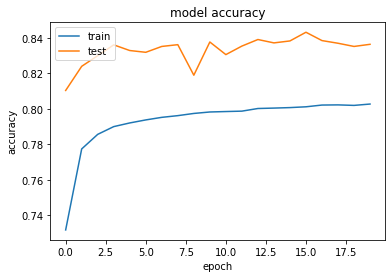

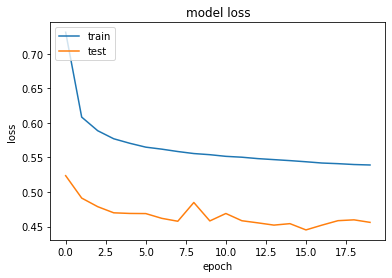

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_13 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_39 (Dense)             (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________
None


In [26]:
# same as code above to create, compile and fit the model but now using the new augmented data
from keras import layers
from keras import Sequential
from keras.layers import Dense
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=10, activation='softmax'))



import tensorflow as tf
opt = tf.keras.optimizers.Adam(learning_rate=1) 

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(x_train, y_train, epochs = 20, validation_data = (x_test, y_test))

# plot the history of the training
import matplotlib.pyplot as plt

# summarize the history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize the history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

print(model.summary())

Set the learning rate to the following values.  You will need to re-create, re-compile and re-fit the model and re-plot the accuracy and loss to try out each learning rate.


*   0.0001
*   0.001
*   0.01
*   1


